# Taking in the data and adding some needed fields

In [1]:
# reading in our data, looks like we only have 112K trips this month yeah that seems to be true
import pandas as pd
import numpy as np
import datetime as dt

data = pd.read_csv('data/202308-citibike-tripdata.csv')

data.head()

data.shape


C:\Users\micha\AppData\Local\Temp\ipykernel_30588\488572048.py:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data/202308-citibike-tripdata.csv')


(4093169, 13)

In [2]:
#  we start of with 4 million so lets see how many have nan of those less than 10K have nan somewhere  
# we are spereating them out for possible anyalis latere and tossing them for the moment 

bad_data = data[data.isna().any(axis=1)]

bad_data 

data = data.dropna()


In [3]:
# search them otherwise.. probably not hard but I don't know how to do it. I think I know how to do it 
# know but at first I did not
day = pd.to_datetime(data.started_at).dt.day
hour = pd.to_datetime(data.started_at).dt.hour
day_week = pd.to_datetime(data.started_at).dt.dayofweek

data
# print(day)
# print(hour)
# print(day_week)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C5E94016E7939757,classic_bike,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,member
1,E88D94798ABBBD7C,classic_bike,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,member
2,341D3CE4743A92EC,classic_bike,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,member
3,21C763DECA96FD02,classic_bike,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,member
4,A8533C28598A6AB8,classic_bike,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,member
4093165,168B289864D8DE47,classic_bike,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,member
4093166,18FC63FE8411C4B1,classic_bike,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,member
4093167,8806D0CDD899C339,classic_bike,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,member


In [4]:
# adding the new columns back
data.insert(2, "day", day, True)
data.insert(3, "hour", hour, True)
data.insert(3, "day_of_week", day_week, True)

data

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C5E94016E7939757,classic_bike,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,member
1,E88D94798ABBBD7C,classic_bike,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,member
2,341D3CE4743A92EC,classic_bike,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,member
3,21C763DECA96FD02,classic_bike,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,member
4,A8533C28598A6AB8,classic_bike,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,1,1,17,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,member
4093165,168B289864D8DE47,classic_bike,27,6,17,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,member
4093166,18FC63FE8411C4B1,classic_bike,24,3,8,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,member
4093167,8806D0CDD899C339,classic_bike,6,6,13,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,member


In [5]:
# ohh yeah durations would be useful!, I am searching for trips that probably did not happen 
import geopy.distance

trip_duration = (pd.to_datetime(data.ended_at) - pd.to_datetime(data.started_at))
# print(trip_duration)

# this is used to make the animated map  
change_in_lng = data['end_lng'] - data['start_lng']
change_in_lat = data['end_lat'] - data['start_lat']
# print(change_in_lng)
# print(change_in_lat)

distance = data.apply(lambda x: geopy.distance.geodesic((x.start_lat, x.start_lng), (x.end_lat, x.end_lng)).mi, axis=1)

# distance = data[['start_lat', 'start_lng']].apply(lambda row: row['start_lat'], axis=1)

distance

# coords_1 = (52.2296756, 21.0122287)
# coords_2 = (52.406374, 16.9251681)

# print geopy.distance.geodesic(coords_1, coords_2).km

# df['point'] = df.apply(lambda row: Point(latitude=row['latitude'], longitude=row['longitude']), axis=1)

0          4.688102
1          0.213118
2          0.566193
3          4.090143
4          5.731129
             ...   
4093164    0.900693
4093165    1.510831
4093166    1.391441
4093167    0.528811
4093168    0.288890
Length: 4083172, dtype: float64

In [6]:
distance.describe()

count    4.083172e+06
mean     1.228217e+00
std      1.165246e+00
min      0.000000e+00
25%      4.590748e-01
50%      8.871873e-01
75%      1.623762e+00
max      1.721649e+01
dtype: float64

In [7]:
# adding these as columns back to data

data.insert(15, "change_in_lat", change_in_lat, True)
data.insert(16, "change_in_lng", change_in_lng, True)
data.insert(17, "distance", distance, True)
data.insert(18, "trip_duration", trip_duration, True)


data.describe()

,day,day_of_week,hour,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration
count,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4.083172e+06,4083172
mean,1.584032e+01,2.895848e+00,1.430747e+01,4.074066e+01,-7.397193e+01,4.074041e+01,-7.397193e+01,-2.566715e-04,-6.399687e-06,1.228217e+00,0 days 00:14:25.671761316
std,9.045824e+00,1.919424e+00,5.132317e+00,4.192855e-02,2.849436e-02,4.194958e-02,2.855145e-02,2.025825e-02,1.819438e-02,1.165246e+00,0 days 00:26:46.691811435
min,1.000000e+00,0.000000e+00,0.000000e+00,4.063126e+01,-7.402805e+01,4.063338e+01,-7.408364e+01,-2.319355e-01,-1.416231e-01,0.000000e+00,-1 days +23:36:57
25%,8.000000e+00,1.000000e+00,1.100000e+01,4.071464e+01,-7.399250e+01,4.071427e+01,-7.399257e+01,-8.446932e-03,-8.415000e-03,4.590748e-01,0 days 00:05:13
50%,1.600000e+01,3.000000e+00,1.500000e+01,4.073936e+01,-7.397950e+01,4.073902e+01,-7.397950e+01,0.000000e+00,0.000000e+00,8.871873e-01,0 days 00:09:39
75%,2.300000e+01,5.000000e+00,1.800000e+01,4.076353e+01,-7.395467e+01,4.076341e+01,-7.395451e+01,8.010770e-03,8.333675e-03,1.623762e+00,0 days 00:17:30
max,3.100000e+01,6.000000e+00,2.300000e+01,4.089416e+01,-7.384944e+01,4.088226e+01,-7.385915e+01,2.073420e-01,1.543468e-01,1.721649e+01,1 days 00:59:34


# CHopping off rides that are too long or too short

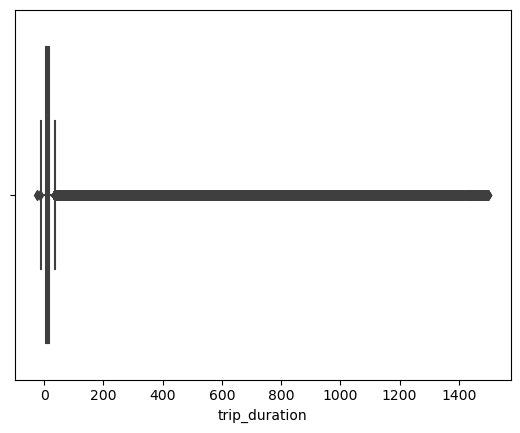

In [8]:
# # can I get the sverage time and standard deviation for the durration??

import matplotlib.pyplot as plt
import seaborn as sns

time = data['trip_duration']/pd.Timedelta(minutes=1)



# 65k rides over 1 hours probably not real

time = time.to_frame(name="trip_duration")

# time

# # boxplot = time.boxplot(column=['trip_duration'])  

sns.boxplot(x=time["trip_duration"])

# # time[time > 60] 

# # df = pd.DataFrame(np.random.randn(10, 2),
# #                    columns=['Col1', 'Col2'])
# # df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
# #                       'B', 'B', 'B', 'B', 'B'])
# # boxplot = df.boxplot(by='X')

plt.show()

time[time >120].count()

long_trips = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) > 60)]

long_trips

data = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) <= 60)]

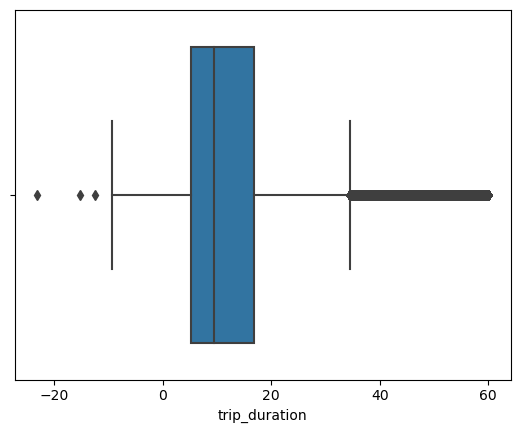

In [9]:
# so we see the average ride is pretty short peaking out at less than 20 minutes
time = data['trip_duration']/pd.Timedelta(minutes=1)


time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])


plt.show()

In [10]:
# 44 negative trips these are just wrong should be checked
neg_trips = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) < 0)]

neg_trips.count()

data = data.loc[(data['trip_duration']/pd.Timedelta(minutes=1) > 0)]

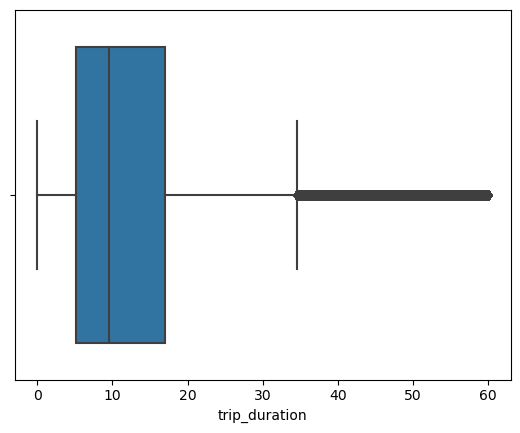

In [11]:
time = data['trip_duration']/pd.Timedelta(minutes=1)


time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])


plt.show()

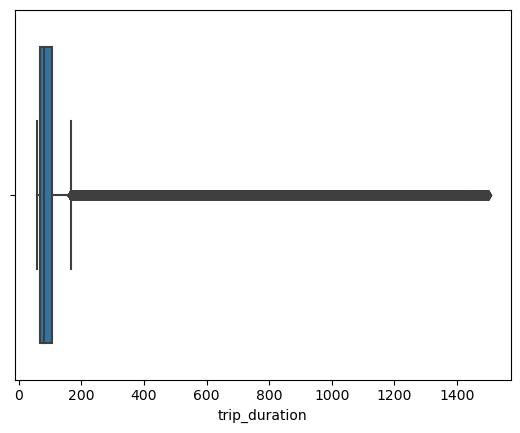

In [12]:
time = long_trips['trip_duration']/pd.Timedelta(minutes=1)


time = time.to_frame(name="trip_duration")

sns.boxplot(x=time["trip_duration"])


plt.show()

In [13]:
data.describe()

,day,day_of_week,hour,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration
count,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4.015883e+06,4015883
mean,1.584590e+01,2.884853e+00,1.430675e+01,4.074049e+01,-7.397194e+01,4.074024e+01,-7.397196e+01,-2.430849e-04,-1.105719e-05,1.215484e+00,0 days 00:12:39.776149354
std,9.052917e+00,1.916205e+00,5.138991e+00,4.182252e-02,2.847669e-02,4.181874e-02,2.851896e-02,1.977935e-02,1.801801e-02,1.131375e+00,0 days 00:10:36.848615506
min,1.000000e+00,0.000000e+00,0.000000e+00,4.063126e+01,-7.402805e+01,4.063338e+01,-7.408364e+01,-2.319355e-01,-1.406766e-01,0.000000e+00,0 days 00:00:01
25%,8.000000e+00,1.000000e+00,1.100000e+01,4.071450e+01,-7.399253e+01,4.071427e+01,-7.399257e+01,-8.424000e-03,-8.415000e-03,4.616200e-01,0 days 00:05:10
50%,1.600000e+01,3.000000e+00,1.500000e+01,4.073925e+01,-7.397951e+01,4.073902e+01,-7.397964e+01,0.000000e+00,0.000000e+00,8.859233e-01,0 days 00:09:29
75%,2.300000e+01,5.000000e+00,1.800000e+01,4.076342e+01,-7.395468e+01,4.076336e+01,-7.395469e+01,8.004204e-03,8.329760e-03,1.612098e+00,0 days 00:16:56
max,3.100000e+01,6.000000e+00,2.300000e+01,4.089416e+01,-7.384944e+01,4.088226e+01,-7.385915e+01,1.891939e-01,1.396530e-01,1.721649e+01,0 days 01:00:00


# Rides less than two minuters and same station

In [14]:
# 260K that are less than 2 minutes
less_2_min = data.loc[data['trip_duration'] < pd.Timedelta("0 days 00:02:00")]

less_2_min                      
                  
# greater_5 = df2.loc[(df2['end_station_name'] > 2)&(df2['trip_duration'] > pd.Timedelta("0 days 00:05:00"))].sort_values(by=['end_station_name'])


,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
1,E88D94798ABBBD7C,classic_bike,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,-0.003056,0.000583,0.213118,0 days 00:01:21,member
35,5FD46C7A01FEEBCB,classic_bike,6,6,20,2023-08-06 20:23:38,2023-08-06 20:24:47,Suydam St & Broadway,4689.03,Malcolm X Blvd & DeKalb Ave,4648.03,40.695440,-73.932230,40.693800,-73.931140,-0.001640,0.001090,0.126819,0 days 00:01:09,member
115,8602C136F15FB9C0,classic_bike,6,6,12,2023-08-06 12:27:09,2023-08-06 12:29:01,E 35 St & Madison Ave,6398.08,E 43 St & Madison Ave,6551.11,40.747932,-73.982847,40.753547,-73.978966,0.005615,0.003881,0.437721,0 days 00:01:52,member
127,D4B8D939683B7694,electric_bike,15,1,18,2023-08-15 18:35:29,2023-08-15 18:36:38,Greene St & Prince St,5602.06,W Broadway & Spring St,5569.06,40.725117,-73.999305,40.724947,-74.001659,-0.000171,-0.002354,0.124116,0 days 00:01:09,member
289,2413500F2F4F260B,classic_bike,31,3,20,2023-08-31 20:14:02,2023-08-31 20:15:40,E 48 St & 5 Ave,6626.01,W 48 St & Rockefeller Plaza,6626.11,40.757460,-73.977439,40.757769,-73.979294,0.000309,-0.001856,0.099676,0 days 00:01:38,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093086,A8B8F3B168B53160,classic_bike,24,3,4,2023-08-24 04:35:00,2023-08-24 04:36:37,Buchanan Pl & Grand Ave,8535.01,E 182 St & Morris Ave,8494.01,40.858557,-73.906583,40.856708,-73.902653,-0.001849,0.003930,0.242238,0 days 00:01:37,member
4093094,7AD6535D8D727B27,classic_bike,1,1,10,2023-08-01 10:50:22,2023-08-01 10:52:05,Lenox Ave & W 130 St,7753.13,Lenox Ave & W 133 St,7790.04,40.810792,-73.943068,40.812960,-73.941878,0.002168,0.001190,0.162077,0 days 00:01:43,member
4093116,D68C06EEA0272836,classic_bike,3,3,9,2023-08-03 09:01:13,2023-08-03 09:02:49,Lenox Ave & W 130 St,7753.13,Lenox Ave & W 133 St,7790.04,40.810792,-73.943068,40.812960,-73.941878,0.002168,0.001190,0.162077,0 days 00:01:36,member
4093141,A6D65F75D9734974,classic_bike,12,5,9,2023-08-12 09:41:16,2023-08-12 09:43:06,Greenpoint Ave & Manhattan Ave,5785.05,Milton St & Franklin St,5752.07,40.730257,-73.954050,40.729060,-73.957790,-0.001197,-0.003740,0.212986,0 days 00:01:50,member


In [15]:
# 130 k rides less then 2 minutes start and stop at the same station
less_2_min_same_satation = less_2_min.loc[less_2_min['start_station_name'] == less_2_min['end_station_name']]

# some quick stats
# almost 2 min, was someone really riding 
print(less_2_min_same_satation['trip_duration'].max())
print(less_2_min_same_satation['trip_duration'].mean())
# not sure what to make of this 
print(less_2_min_same_satation['trip_duration'].min())

less_2_min_same_satation.describe()

0 days 00:01:59
0 days 00:00:32.773303894
0 days 00:00:01


,day,day_of_week,hour,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration
count,128176.000000,128176.000000,128176.000000,128176.000000,128176.000000,128176.000000,128176.000000,128176.000000,128176.000000,128176.000000,128176
mean,15.207215,2.966335,14.820520,40.757888,-73.963279,40.757922,-73.963226,0.000034,0.000053,0.029354,0 days 00:00:32.773303894
std,9.217229,1.897962,5.102397,0.050865,0.034116,0.050898,0.034129,0.004462,0.003362,0.353636,0 days 00:00:29.381551751
min,1.000000,0.000000,0.000000,40.633385,-74.026836,40.633385,-74.080843,-0.175980,-0.124056,0.000000,0 days 00:00:01
25%,7.000000,1.000000,12.000000,40.721545,-73.990123,40.721319,-73.990110,0.000000,0.000000,0.000000,0 days 00:00:08
50%,15.000000,3.000000,16.000000,40.752062,-73.972095,40.752062,-73.972078,0.000000,0.000000,0.000000,0 days 00:00:25
75%,23.000000,5.000000,18.000000,40.793460,-73.937908,40.793460,-73.937900,0.000000,0.000000,0.006375,0 days 00:00:49
max,31.000000,6.000000,23.000000,40.882298,-73.859150,40.882260,-73.859150,0.189194,0.120825,13.353956,0 days 00:01:59


In [16]:
# so I could get lots  of information from this I persume 
print(less_2_min_same_satation['start_station_name'].value_counts()) 

# spitting it out
less_2_min_same_satation.to_csv("data/less_2_min_same_satation.csv", sep='\t', encoding='utf-8')


11 Ave & W 41 St                     613
West St & Chambers St                558
Broadway & W 58 St                   477
Grand Concourse & E 164 St           455
Grand Army Plaza & Central Park S    433
                                    ... 
Ditmars Blvd & 48 St                   1
60 St & 37 Ave                         1
56 Dr & 61 St                          1
23 Ave & 83 St                         1
W 211 St & 10 Ave                      1
Name: start_station_name, Length: 1909, dtype: int64


In [17]:
# grouping everything so i can det the aggreates by station and type
test = less_2_min_same_satation.groupby(['start_station_name', 'day', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()
# df.groupby(['Animal']).mean()
# test = less_2_min_same_satation.groupby(['start_station_name', 'day', 'rideable_type']).mean(['start_lat'])
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
test

,start_station_name,day,rideable_type,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,1,classic_bike,40.792332,-73.938289,5
1,1 Ave & E 110 St,1,electric_bike,40.792327,-73.938300,2
2,1 Ave & E 110 St,2,classic_bike,40.792314,-73.938271,3
3,1 Ave & E 110 St,2,electric_bike,40.792327,-73.938300,1
4,1 Ave & E 110 St,3,classic_bike,40.792361,-73.938211,26
...,...,...,...,...,...,...
45224,Yankee Ferry Terminal,25,classic_bike,40.687066,-74.016756,1
45225,Yankee Ferry Terminal,26,classic_bike,40.687066,-74.016756,3
45226,Yankee Ferry Terminal,27,classic_bike,40.687066,-74.016756,1
45227,Yankee Ferry Terminal,28,classic_bike,40.687200,-74.016544,1


In [18]:
test_2 = less_2_min_same_satation.groupby(['start_station_name', 'day']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()
# df.groupby(['Animal']).mean()
# test = less_2_min_same_satation.groupby(['start_station_name', 'day', 'rideable_type']).mean(['start_lat'])
# df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})
test_2

,start_station_name,day,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,1,40.792331,-73.938292,7
1,1 Ave & E 110 St,2,40.792317,-73.938278,4
2,1 Ave & E 110 St,3,40.792360,-73.938215,27
3,1 Ave & E 110 St,4,40.792327,-73.938300,2
4,1 Ave & E 110 St,5,40.792576,-73.938500,2
...,...,...,...,...,...
34922,Yankee Ferry Terminal,25,40.687066,-74.016756,1
34923,Yankee Ferry Terminal,26,40.687066,-74.016756,3
34924,Yankee Ferry Terminal,27,40.687066,-74.016756,1
34925,Yankee Ferry Terminal,28,40.687200,-74.016544,1


In [19]:
# still doing it 
test_2.insert(loc = 2, column = 'rideable_type', value = "All")

test_2

,start_station_name,day,rideable_type,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,1,All,40.792331,-73.938292,7
1,1 Ave & E 110 St,2,All,40.792317,-73.938278,4
2,1 Ave & E 110 St,3,All,40.792360,-73.938215,27
3,1 Ave & E 110 St,4,All,40.792327,-73.938300,2
4,1 Ave & E 110 St,5,All,40.792576,-73.938500,2
...,...,...,...,...,...,...
34922,Yankee Ferry Terminal,25,All,40.687066,-74.016756,1
34923,Yankee Ferry Terminal,26,All,40.687066,-74.016756,3
34924,Yankee Ferry Terminal,27,All,40.687066,-74.016756,1
34925,Yankee Ferry Terminal,28,All,40.687200,-74.016544,1


In [20]:
test_3 = less_2_min_same_satation.groupby(['start_station_name', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()

test_3

,start_station_name,rideable_type,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,classic_bike,40.792337,-73.938202,89
1,1 Ave & E 110 St,electric_bike,40.792327,-73.938300,21
2,1 Ave & E 16 St,classic_bike,40.732202,-73.981812,134
3,1 Ave & E 16 St,electric_bike,40.732219,-73.981656,27
4,1 Ave & E 18 St,classic_bike,40.733741,-73.980575,124
...,...,...,...,...,...
3584,Wythe Ave & Metropolitan Ave,classic_bike,40.716925,-73.963191,90
3585,Wythe Ave & Metropolitan Ave,electric_bike,40.716887,-73.963198,37
3586,Wythe Ave & N 13 St,classic_bike,40.722705,-73.957077,40
3587,Wythe Ave & N 13 St,electric_bike,40.722767,-73.957021,23


In [21]:
test_3.insert(loc = 1, column = 'day', value = 0)

test_3


,start_station_name,day,rideable_type,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,0,classic_bike,40.792337,-73.938202,89
1,1 Ave & E 110 St,0,electric_bike,40.792327,-73.938300,21
2,1 Ave & E 16 St,0,classic_bike,40.732202,-73.981812,134
3,1 Ave & E 16 St,0,electric_bike,40.732219,-73.981656,27
4,1 Ave & E 18 St,0,classic_bike,40.733741,-73.980575,124
...,...,...,...,...,...,...
3584,Wythe Ave & Metropolitan Ave,0,classic_bike,40.716925,-73.963191,90
3585,Wythe Ave & Metropolitan Ave,0,electric_bike,40.716887,-73.963198,37
3586,Wythe Ave & N 13 St,0,classic_bike,40.722705,-73.957077,40
3587,Wythe Ave & N 13 St,0,electric_bike,40.722767,-73.957021,23


In [22]:
test_4 = less_2_min_same_satation.groupby('start_station_name').agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()

test_4

,start_station_name,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,40.792335,-73.938221,110
1,1 Ave & E 16 St,40.732205,-73.981786,161
2,1 Ave & E 18 St,40.733759,-73.980567,165
3,1 Ave & E 30 St,40.741010,-73.975180,133
4,1 Ave & E 39 St,40.746908,-73.971090,242
...,...,...,...,...
1904,Wyckoff Ave & Gates Ave,40.699854,-73.911691,63
1905,Wyckoff St & 3 Ave,40.682776,-73.982611,21
1906,Wythe Ave & Metropolitan Ave,40.716914,-73.963193,127
1907,Wythe Ave & N 13 St,40.722727,-73.957056,63


In [23]:
test_4.insert(loc = 1, column = 'day',  value = 0)

test_4.insert(loc = 2, column = 'rideable_type',  value = 'All')
test_4


,start_station_name,day,rideable_type,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,0,All,40.792335,-73.938221,110
1,1 Ave & E 16 St,0,All,40.732205,-73.981786,161
2,1 Ave & E 18 St,0,All,40.733759,-73.980567,165
3,1 Ave & E 30 St,0,All,40.741010,-73.975180,133
4,1 Ave & E 39 St,0,All,40.746908,-73.971090,242
...,...,...,...,...,...,...
1904,Wyckoff Ave & Gates Ave,0,All,40.699854,-73.911691,63
1905,Wyckoff St & 3 Ave,0,All,40.682776,-73.982611,21
1906,Wythe Ave & Metropolitan Ave,0,All,40.716914,-73.963193,127
1907,Wythe Ave & N 13 St,0,All,40.722727,-73.957056,63


In [24]:
# putting them all back together
test = pd.concat([test, test_2])
test = pd.concat([test, test_3])
test = pd.concat([test, test_4])
test

,start_station_name,day,rideable_type,start_lat,start_lng,start_station_id
0,1 Ave & E 110 St,1,classic_bike,40.792332,-73.938289,5
1,1 Ave & E 110 St,1,electric_bike,40.792327,-73.938300,2
2,1 Ave & E 110 St,2,classic_bike,40.792314,-73.938271,3
3,1 Ave & E 110 St,2,electric_bike,40.792327,-73.938300,1
4,1 Ave & E 110 St,3,classic_bike,40.792361,-73.938211,26
...,...,...,...,...,...,...
1904,Wyckoff Ave & Gates Ave,0,All,40.699854,-73.911691,63
1905,Wyckoff St & 3 Ave,0,All,40.682776,-73.982611,21
1906,Wythe Ave & Metropolitan Ave,0,All,40.716914,-73.963193,127
1907,Wythe Ave & N 13 St,0,All,40.722727,-73.957056,63


In [25]:
test.to_csv("data/test.csv", sep='\t', encoding='utf-8')

# Info for the animated map

In [26]:
# so this is a ton of data and I need to trim it down, this is for the animated 
# map
# first day midnight to 4
one_day = data.loc[(data['day'] == 1) & (data['hour'] < 10)]


In [27]:
# Ok so this I can work with, probably beter if i drop some columns 
one_day

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
209,93FD3D40EE65143E,classic_bike,1,1,1,2023-08-01 01:46:09,2023-08-01 01:54:54,E Tremont Ave & E 176 St,8356.02,E 169 St & Webster Ave,8122.04,40.847798,-73.901883,40.834015,-73.908863,-0.013783,-0.006980,1.018995,0 days 00:08:45,casual
232,98C26814FA5A5079,classic_bike,1,1,9,2023-08-01 09:30:12,2023-08-01 09:53:19,Knickerbocker Ave & Halsey St,4623.02,Calyer St & West St,5676.04,40.692977,-73.908285,40.726930,-73.958630,0.033953,-0.050345,3.532288,0 days 00:23:07,casual
715,246D86C51A1731C0,classic_bike,1,1,9,2023-08-01 09:19:04,2023-08-01 09:23:53,21 St & 4 Ave,3668.04,10 St & 4 Ave,3882.05,40.662584,-73.995554,40.669674,-73.988989,0.007090,0.006565,0.598572,0 days 00:04:49,member
732,107AD4422765595B,classic_bike,1,1,9,2023-08-01 09:59:21,2023-08-01 10:02:00,Richardson St & N Henry St,5433.03,Graham Ave & Conselyea St,5291.05,40.719079,-73.942237,40.715143,-73.944507,-0.003936,-0.002270,0.296588,0 days 00:02:39,member
1172,01B8552594CB2DF7,classic_bike,1,1,8,2023-08-01 08:36:06,2023-08-01 08:42:30,Ogden Ave & W 164 St,8115.01,Morris Ave & E 153 St,7901.04,40.832678,-73.929436,40.820036,-73.921411,-0.012642,0.008025,0.968432,0 days 00:06:24,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092477,7D70122B7E743D28,classic_bike,1,1,7,2023-08-01 07:22:20,2023-08-01 07:23:54,Sherman Ave & Thayer St,8583.02,Broadway & Ellwood St,8547.04,40.863124,-73.926994,40.862058,-73.929719,-0.001066,-0.002725,0.160593,0 days 00:01:34,member
4092479,B01B427D3031DF4F,electric_bike,1,1,7,2023-08-01 07:53:08,2023-08-01 07:56:58,E 58 St & 1 Ave (NW Corner),6723.10,1 Ave & E 68 St,6822.09,40.759125,-73.962658,40.765005,-73.958185,0.005880,0.004473,0.468738,0 days 00:03:50,member
4092513,FD726094229234B5,electric_bike,1,1,9,2023-08-01 09:15:04,2023-08-01 09:25:13,Greenpoint Ave & Manhattan Ave,5785.05,44 Dr & Jackson Ave,6352.01,40.730260,-73.953940,40.747182,-73.943264,0.016922,0.010677,1.295179,0 days 00:10:09,member
4092711,15C1A35D8007731E,classic_bike,1,1,7,2023-08-01 07:15:29,2023-08-01 07:28:07,E 89 St & 3 Ave,7265.10,1 Ave & E 68 St,6822.09,40.780628,-73.952167,40.765005,-73.958185,-0.015623,-0.006018,1.123320,0 days 00:12:38,member


In [28]:
# dropping rides that never ended, hopefully don't need this anymore
one_day = one_day[one_day['end_lat'].notna()]
one_day.shape

(32669, 20)

In [29]:
# take the rides and chop them up into 50 rows this is the heart of it 

one_day_1 = one_day.copy()

for i in range(1,41):

    one_day_2 = one_day.copy()

    one_day_2['started_at'] = pd.to_datetime(one_day_2['started_at']) + (i * one_day_2['trip_duration'])/50

    one_day_2['start_lat'] = one_day_2['start_lat'] + (i * one_day_2['change_in_lat'])/50
    
    one_day_2['start_lng'] = one_day_2['start_lng'] + (i * one_day_2['change_in_lng'])/50

    one_day_1 = pd.concat([one_day_1, one_day_2])

one_day_1

# one_day_2['trip_duration']/10


,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
209,93FD3D40EE65143E,classic_bike,1,1,1,2023-08-01 01:46:09,2023-08-01 01:54:54,E Tremont Ave & E 176 St,8356.02,E 169 St & Webster Ave,8122.04,40.847798,-73.901883,40.834015,-73.908863,-0.013783,-0.006980,1.018995,0 days 00:08:45,casual
232,98C26814FA5A5079,classic_bike,1,1,9,2023-08-01 09:30:12,2023-08-01 09:53:19,Knickerbocker Ave & Halsey St,4623.02,Calyer St & West St,5676.04,40.692977,-73.908285,40.726930,-73.958630,0.033953,-0.050345,3.532288,0 days 00:23:07,casual
715,246D86C51A1731C0,classic_bike,1,1,9,2023-08-01 09:19:04,2023-08-01 09:23:53,21 St & 4 Ave,3668.04,10 St & 4 Ave,3882.05,40.662584,-73.995554,40.669674,-73.988989,0.007090,0.006565,0.598572,0 days 00:04:49,member
732,107AD4422765595B,classic_bike,1,1,9,2023-08-01 09:59:21,2023-08-01 10:02:00,Richardson St & N Henry St,5433.03,Graham Ave & Conselyea St,5291.05,40.719079,-73.942237,40.715143,-73.944507,-0.003936,-0.002270,0.296588,0 days 00:02:39,member
1172,01B8552594CB2DF7,classic_bike,1,1,8,2023-08-01 08:36:06,2023-08-01 08:42:30,Ogden Ave & W 164 St,8115.01,Morris Ave & E 153 St,7901.04,40.832678,-73.929436,40.820036,-73.921411,-0.012642,0.008025,0.968432,0 days 00:06:24,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092477,7D70122B7E743D28,classic_bike,1,1,7,2023-08-01 07:23:35.200000,2023-08-01 07:23:54,Sherman Ave & Thayer St,8583.02,Broadway & Ellwood St,8547.04,40.862271,-73.929174,40.862058,-73.929719,-0.001066,-0.002725,0.160593,0 days 00:01:34,member
4092479,B01B427D3031DF4F,electric_bike,1,1,7,2023-08-01 07:56:12,2023-08-01 07:56:58,E 58 St & 1 Ave (NW Corner),6723.10,1 Ave & E 68 St,6822.09,40.763829,-73.959080,40.765005,-73.958185,0.005880,0.004473,0.468738,0 days 00:03:50,member
4092513,FD726094229234B5,electric_bike,1,1,9,2023-08-01 09:23:11.200000,2023-08-01 09:25:13,Greenpoint Ave & Manhattan Ave,5785.05,44 Dr & Jackson Ave,6352.01,40.743798,-73.945399,40.747182,-73.943264,0.016922,0.010677,1.295179,0 days 00:10:09,member
4092711,15C1A35D8007731E,classic_bike,1,1,7,2023-08-01 07:25:35.400000,2023-08-01 07:28:07,E 89 St & 3 Ave,7265.10,1 Ave & E 68 St,6822.09,40.768130,-73.956981,40.765005,-73.958185,-0.015623,-0.006018,1.123320,0 days 00:12:38,member


In [30]:
one_day_1 = one_day_1.sort_values(by = ['started_at', 'ride_id'], ascending = [True, False], na_position = 'first')

one_day_1.to_csv("data/second_attempt.csv", sep='\t', encoding='utf-8')

one_day_1

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
789965,BE1B5925CB64E4C1,electric_bike,1,1,0,2023-08-01 00:00:15.220000,2023-08-01 00:09:25,Suydam St & Knickerbocker Ave,4939.07,53 St & Flushing Ave,5257.01,40.702260,-73.923575,40.714350,-73.914050,0.012337,0.009719,0.992532,0 days 00:09:21,casual
3021503,2530C842B0DA594D,classic_bike,1,1,0,2023-08-01 00:00:18.260000,2023-08-01 00:04:36,Lafayette St & Grand St,5422.09,Church St & Worth St,5359.13,40.720201,-73.998995,40.716885,-74.006501,-0.003383,-0.007660,0.464995,0 days 00:04:23,member
520021,0D036C6FA4B343C2,classic_bike,1,1,0,2023-08-01 00:00:22.720000,2023-08-01 00:07:30,5 St & Market St,4843.01,DeKalb Ave & Hudson Ave,4513.06,40.699795,-73.974534,40.689888,-73.981013,-0.010109,-0.006612,0.779224,0 days 00:07:16,member
3021503,2530C842B0DA594D,classic_bike,1,1,0,2023-08-01 00:00:23.520000,2023-08-01 00:04:36,Lafayette St & Grand St,5422.09,Church St & Worth St,5359.13,40.720133,-73.999148,40.716885,-74.006501,-0.003383,-0.007660,0.464995,0 days 00:04:23,member
789965,BE1B5925CB64E4C1,electric_bike,1,1,0,2023-08-01 00:00:26.440000,2023-08-01 00:09:25,Suydam St & Knickerbocker Ave,4939.07,53 St & Flushing Ave,5257.01,40.702506,-73.923380,40.714350,-73.914050,0.012337,0.009719,0.992532,0 days 00:09:21,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4090398,FF00765CE6D3880C,classic_bike,1,1,9,2023-08-01 09:59:59,2023-08-01 10:14:34,W 24 St & 7 Ave,6257.03,Madison Ave & E 26 St,6131.12,40.744860,-73.995380,40.742685,-73.986713,-0.002175,0.008667,0.478981,0 days 00:14:35,member
3328413,B7AA10F2038AE14A,classic_bike,1,1,9,2023-08-01 09:59:59,2023-08-01 10:18:49,West Thames St,5114.06,W 29 St & 9 Ave,6416.06,40.708429,-74.017227,40.750073,-73.998393,0.041644,0.018834,3.038845,0 days 00:18:50,member
3220352,76266D508522419C,classic_bike,1,1,9,2023-08-01 09:59:59,2023-08-01 10:23:04,Sheridan Ave & E 172 St,8229.04,Grand Concourse & East Mount Eden Ave,8265.09,40.840626,-73.911377,40.843010,-73.911720,0.002384,-0.000343,0.165515,0 days 00:23:05,casual
1988184,74074FEB591DA6B9,classic_bike,1,1,9,2023-08-01 09:59:59,2023-08-01 10:07:31,E 43 St & Madison Ave,6551.11,W 43 St & 10 Ave,6756.01,40.753547,-73.978966,40.760094,-73.994618,0.006548,-0.015653,0.937376,0 days 00:07:32,member


In [31]:
one_day_1.loc[(one_day_1['ride_id'] == 'F5F60429DF82C79F')]

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:26:09.900000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755179,-73.974732,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:26:18.800000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755256,-73.974478,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:26:27.700000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755332,-73.974223,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:26:36.600000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755408,-73.973969,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:26:45.500000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755485,-73.973714,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:26:54.400000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755561,-73.973460,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:27:03.300000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755638,-73.973206,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:27:12.200000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755714,-73.972951,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:27:21.100000,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755790,-73.972697,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member
4086835,F5F60429DF82C79F,classic_bike,1,1,0,2023-08-01 00:27:30,2023-08-01 00:33:26,E 47 St & Park Ave,6584.12,E 58 St & 1 Ave (NE Corner),6682.03,40.755867,-73.972442,40.758924,-73.962262,0.003821,0.012725,0.717852,0 days 00:07:25,member


# wanted to get just the stations

In [32]:
# doing a bunch of work just to get stations though goes pretty quickly don't think I am using it but that's ok

start_stations = data[['start_station_name', 'start_station_id','start_lat','start_lng']].copy()
start_stations = start_stations.rename(columns={"start_station_name": "station_name", "start_station_id": "station_id","start_lat": 'lat', "start_lng": "lng"})
end_stations = data[['end_station_name','end_station_id', 'end_lat','end_lng']].copy()
end_stations = end_stations.rename(columns={"end_station_name": "station_name", "end_station_id": "station_id","end_lat": 'lat', "end_lng": "lng"})


station_names =  pd.concat([start_stations, end_stations])
station_names

,station_name,station_id,lat,lng
0,Lexington Ave & E 36 St,6313.10,40.747574,-73.978801
1,Rockaway Ave & Bainbridge St,4285.09,40.683236,-73.911943
2,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
3,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613
4,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
...,...,...,...,...
4093164,Gramercy Park N & Gramercy Park E,6013.12,40.737950,-73.985090
4093165,W 47 St & 10 Ave,6824.07,40.762699,-73.993012
4093166,Kingston Ave & Herkimer St,4205.06,40.678907,-73.941428
4093167,Lenox Ave & W 133 St,7790.04,40.812960,-73.941878


In [33]:
locations = data[['start_station_name', 'start_station_id', 'start_lat','start_lng']].copy()

locations.shape

(4015883, 4)

In [34]:
locations = locations.drop_duplicates('start_station_id')

print(locations.shape)

locations.head()

(3871, 4)


,start_station_name,start_station_id,start_lat,start_lng
0,Lexington Ave & E 36 St,6313.10,40.747574,-73.978801
1,Rockaway Ave & Bainbridge St,4285.09,40.683236,-73.911943
2,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
3,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613
6,E Houston St & Columbia St,5436.11,40.719786,-73.978716


In [35]:
# looks like I was cleaning up data 
station_names = station_names.drop_duplicates('station_id')

print(station_names.shape)

salary_nan_count = station_names['station_id'].isna().sum()

print(salary_nan_count)


station_names

(3911, 4)
0


,station_name,station_id,lat,lng
0,Lexington Ave & E 36 St,6313.10,40.747574,-73.978801
1,Rockaway Ave & Bainbridge St,4285.09,40.683236,-73.911943
2,W 13 St & 5 Ave,5947.04,40.735445,-73.994310
3,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613
6,E Houston St & Columbia St,5436.11,40.719786,-73.978716
...,...,...,...,...
3362744,Harborside,JC104,40.719252,-74.034234
3460054,Columbus Drive,JC014,40.718355,-74.038914
3615832,Newport Pkwy,JC008,40.728745,-74.032108
3774387,Willow Ave & 12 St,HB505,40.751867,-74.030377


In [36]:
station_names.to_csv("data/stations.csv", sep='\t', encoding='utf-8')

# A bunch of earlier stuff not sure if I need

In [37]:
# just getting ride of some rows that did not seem important
subset = data.iloc[:,2:12]

# print(list(data.columns[2:3]) + list(data.columns[4:12]))

# list(data.columns[1]) + list(df.columns[4:])
subset.head()

# so really I should make a table that has station id, name, lat and long, then i can fix lost information and remove a bunch
# of columns

,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat
0,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574
1,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236
2,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445
3,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484
4,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445


In [38]:
# ha it's along the water in new jersy no wondre it's so popular at midnight 
data.loc[data['start_station_id'] == 'HB103']

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
3702216,6D64386D86D8CEA9,classic_bike,18,4,22,2023-08-18 22:27:28,2023-08-18 23:17:31,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,Bergen Ave & Sip Ave,JC109,40.728795,-74.011989,40.731009,-74.064437,0.002214,-0.052448,2.757344,0 days 00:50:03,member
3977596,F78ED6338EB2EAA8,classic_bike,12,5,14,2023-08-12 14:51:54,2023-08-12 14:59:26,South Waterfront Walkway - Sinatra Dr & 1 St,HB103,14 St Ferry - 14 St & Shipyard Ln,HB202,40.697710,-73.969835,40.752961,-74.024353,0.055251,-0.054517,4.767095,0 days 00:07:32,casual


In [39]:
# calculating the duarion of the trip... what about trip to the same station??

pd.to_datetime(data.started_at)

# subset.dtypes
subset['trip_duration'] = (pd.to_datetime(data.ended_at)- pd.to_datetime(data.started_at))

subset.head()

,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,trip_duration
0,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,0 days 00:35:37
1,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,0 days 00:01:21
2,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,0 days 00:06:15
3,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,0 days 00:30:13
4,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,0 days 00:47:18


In [40]:
# so like 5 k that seem like they are meaningless or bad bikes,
# I guess this could be it's own information like how many misfires do you get a month 

# subset.loc[subset['trip_duration'] < pd.Timedelta("0 days 00:02:00")]
# subset.sort_values(by=['trip_duration'])

# 120 with no end information and seemingly long trips so possibly stolen or bad stations 
# same here possible stolen bikes is it more concentrated in certain areas 
# subset.loc[subset['end_lat'].isna()]

# subset.loc[subset['start_lat'].isna()]
# should be looking for more bad data

In [41]:
# spliting hour and date not sure if it is nec
subset['start_date'] = pd.to_datetime(data.started_at).dt.date
subset['start_hour'] = pd.to_datetime(data.started_at).dt.hour

# subset['start_at'] = pd.to_datetime(data.started_at)

# subset.assign(Date=pd.to_datetime(subset.started_at).dt.round('H'))
# df['date'] = df['full_date'].dt.date
# df['time'] = df['full_date'].dt.time

subset.head()
# subset.dtypes

,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,trip_duration,start_date,start_hour
0,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,0 days 00:35:37,2023-08-29,21
1,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,0 days 00:01:21,2023-08-06,19
2,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,0 days 00:06:15,2023-08-02,20
3,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,0 days 00:30:13,2023-08-14,13
4,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,0 days 00:47:18,2023-08-03,13


In [42]:
# just getting rid of more unwanted data


subset = subset.iloc[:,3:]

In [43]:
subset.head()

,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,trip_duration,start_date,start_hour
0,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,0 days 00:35:37,2023-08-29,21
1,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,0 days 00:01:21,2023-08-06,19
2,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,0 days 00:06:15,2023-08-02,20
3,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,0 days 00:30:13,2023-08-14,13
4,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,0 days 00:47:18,2023-08-03,13


In [44]:
# here I am starting to aggreate my data this does it by day and hour 
# df2 = subset.groupby(['start_station_id','end_station_id', 'start_date', 'start_hour'])['end_station_name'].count().reset_index() 

# so you can get average trip duration 
# df2 = subset.groupby(['start_station_id','end_station_id', 'start_date', 'start_hour']).agg({'end_station_name':'size', 'trip_duration':'mean'}).reset_index() 

df2 = subset.groupby(['start_station_id','end_station_id']).agg({'end_station_name':'size', 'trip_duration':'mean'}).reset_index() 


print(df2.shape)

# df2.sort_values(by=['end_station_name'])

# when we do it by day and hour we really only drop 20k of which 5k maybe bad bikes 

# so just 3K stations that have more than one trip to same station when looked at by 
# df2.loc[df2['end_station_name'] > 2].sort_values(by=['end_station_name'])

greater_5 = df2.loc[(df2['end_station_name'] > 2)&(df2['trip_duration'] > pd.Timedelta("0 days 00:05:00"))].sort_values(by=['end_station_name'])


# (df['channel'] == 'sale')&(df['type']=='A')
# maybe I should start with the whole month, then work to a week or somethiing 

greater_5.shape

(787596, 4)


(284873, 4)

In [45]:

# here i was just checking 

# rslt_df = subset[(subset['start_station_id']=='JC003') & (subset['end_station_id']  == 'JC115')  & (subset['start_hour']  == 11)] 

# #  np.where((data['start_station_id']=='JC003') & (data['end_station_id']  == 'JC115')) & (dataFrame['JOB'].str.startswith('D')))

# rslt_df

In [46]:
# salary_nan_count = greater_5['start_station_id'].isna().sum()

# ok will probably just redo this without pairing down my data 

salary_nan_count = greater_5['end_station_id'].isna().sum()

print(salary_nan_count)

greater_5_1 = pd.merge(greater_5, station_names, left_on='start_station_id', right_on='station_id')

greater_5_1.shape
greater_5_2 =  pd.merge(greater_5_1, station_names, left_on='end_station_id', right_on='station_id')



# greater_5_2.to_csv("data/rides.csv", sep='\t', encoding='utf-8')

greater_5_2.head()

greater_5_2 = greater_5_2.loc[(greater_5_2['end_station_name'] > 100)]

greater_5_2.to_csv("data/rides.csv", sep='\t', encoding='utf-8')

greater_5_2

0


,start_station_id,end_station_id,end_station_name,trip_duration,station_name_x,station_id_x,lat_x,lng_x,station_name_y,station_id_y,lat_y,lng_y
97,5545.01,5545.01,102,0 days 00:06:33.205882352,E 7 St & Ave C,5545.01,40.724129,-73.979013,E 7 St & Ave C,5545.01,40.724129,-73.979013
120,5712.03,5545.01,117,0 days 00:06:31.717948717,Cooper Square & Astor Pl,5712.03,40.729633,-73.990711,E 7 St & Ave C,5545.01,40.724129,-73.979013
413,5300.05,5308.04,139,0 days 00:05:00.050359712,Metropolitan Ave & Meeker Ave,5300.05,40.714152,-73.952541,Metropolitan Ave & Bedford Ave,5308.04,40.715348,-73.960241
481,5187.03,5308.04,127,0 days 00:05:37.433070866,Hope St & Union Ave,5187.03,40.711674,-73.951413,Metropolitan Ave & Bedford Ave,5308.04,40.715348,-73.960241
793,5235.10,5235.10,121,0 days 00:05:11.280991735,Driggs Ave & S 2 St,5235.10,40.712381,-73.960812,Driggs Ave & S 2 St,5235.10,40.712381,-73.960812
...,...,...,...,...,...,...,...,...,...,...,...,...
284864,4440.02,4590.01,183,0 days 00:25:03.836065573,Yankee Ferry Terminal,4440.02,40.687066,-74.016756,Soissons Landing,4590.01,40.692317,-74.014866
284865,4590.01,4590.01,264,0 days 00:29:52.295454545,Soissons Landing,4590.01,40.692317,-74.014866,Soissons Landing,4590.01,40.692317,-74.014866
284869,4590.01,4374.01,133,0 days 00:21:59.992481203,Soissons Landing,4590.01,40.692317,-74.014866,Picnic Point,4374.01,40.685237,-74.025318
284870,4440.02,4374.01,202,0 days 00:23:46.331683168,Yankee Ferry Terminal,4440.02,40.687066,-74.016756,Picnic Point,4374.01,40.685126,-74.025353


# Bike counter data 

In [47]:
# the other biking data 


# reading in data
new_data = pd.read_csv('data/Bicycle_Counters_20231119.csv')

new_data

,id,name,domain,latitude,longitude,interval,timezone,sens,counter
0,300028963,Willis Ave,New York City DOT,40.807046,-73.924393,0,(UTC-05:00) US/Eastern;DST,5,YAH22104565
1,100010017,Staten Island Ferry,New York City DOT,40.643387,-74.072075,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104568
2,300027723,Fountain Ave,New York City DOT,40.655606,-73.862951,15,(UTC-05:00) US/Eastern;DST,5,Y2H22104569
3,300029648,Willis Ave Peds,New York City DOT,40.807046,-73.924393,15,(UTC-05:00) US/Eastern;DST,5,NaN
4,300029647,Willis Ave Bikes,New York City DOT,40.807046,-73.924393,15,(UTC-05:00) US/Eastern;DST,5,NaN
5,100057318,Broadway at 50th St,New York City DOT,40.761380,-73.984080,15,(UTC-05:00) US/Eastern;DST,5,Y2H18055362
6,100010018,Pulaski Bridge,New York City DOT,40.742563,-73.951492,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042948
7,100009426,Manhattan Bridge Ped Path,New York City DOT,40.714573,-73.994950,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042941
8,100010019,Kent Ave btw North 8th St and North 9th St,New York City DOT,40.720959,-73.960930,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042949
9,100010022,Brooklyn Bridge Bike Path,New York City DOT,40.709274,-74.000990,15,(UTC-05:00) US/Eastern;DST,5,Y2H22042940


In [48]:
new_data_2 = pd.read_csv('data/Bicycle_Counts_20231119.csv')

new_data_2

,countid,id,date,counts,status
0,10347035,100009424,12/24/2018 03:30:00 AM,0,4
1,10347036,100009424,12/24/2018 03:45:00 AM,0,4
2,10347037,100009424,12/24/2018 04:00:00 AM,0,4
3,10347038,100009424,12/24/2018 04:15:00 AM,0,4
4,10347039,100009424,12/24/2018 04:30:00 AM,0,4
...,...,...,...,...,...
5096576,48028360,300027723,11/18/2023 10:45:00 PM,0,0
5096577,48028361,300027723,11/18/2023 11:00:00 PM,0,0
5096578,48028362,300027723,11/18/2023 11:15:00 PM,0,0
5096579,48028363,300027723,11/18/2023 11:30:00 PM,0,0


In [49]:
new_data_2 = new_data_2[4800000: 5000000]
new_data_2

,countid,id,date,counts,status
4800000,21167559,100010022,06/11/2023 02:00:00 PM,0,0
4800001,21167560,100010022,06/11/2023 02:15:00 PM,2,0
4800002,21167561,100010022,06/11/2023 02:30:00 PM,1,0
4800003,21167562,100010022,06/11/2023 02:45:00 PM,0,0
4800004,21167563,100010022,06/11/2023 03:00:00 PM,3,0
...,...,...,...,...,...
4999995,39187894,100010017,09/27/2023 02:00:00 AM,0,0
4999996,39187895,100010017,09/27/2023 02:15:00 AM,2,0
4999997,39187896,100010017,09/27/2023 02:30:00 AM,0,0
4999998,39187897,100010017,09/27/2023 02:45:00 AM,1,0


In [50]:
# new_data_2['date'] = pd.to_datetime(new_data_2['date'])
# new_data_2['date']

In [51]:
filtered_df = new_data_2.loc[(pd.to_datetime(new_data_2['date']) >= '2023-08-01')
                     & (pd.to_datetime(new_data_2['date']) < '2023-09-01')]

filtered_df

,countid,id,date,counts,status
4894002,29678222,100009425,08/01/2023 12:00:00 AM,22,0
4894003,29678223,100009425,08/01/2023 12:15:00 AM,11,0
4894004,29678224,100009425,08/01/2023 12:30:00 AM,9,0
4894005,29678225,100009425,08/01/2023 12:45:00 AM,8,0
4894006,29678226,100009425,08/01/2023 01:00:00 AM,8,0
...,...,...,...,...,...
4958710,35517176,100010019,08/31/2023 10:45:00 PM,26,0
4958711,35517177,100010019,08/31/2023 11:00:00 PM,27,0
4958712,35517178,100010019,08/31/2023 11:15:00 PM,20,0
4958713,35517179,100010019,08/31/2023 11:30:00 PM,16,0


In [52]:
# result = pd.concat([new_data, filtered_df], axis=1, join="inner")

# result
counts = new_data.merge(filtered_df, left_on='id', right_on='id')

counts.to_csv("data/counts.csv", sep='\t', encoding='utf-8')

# For the line map 

In [53]:
# want to create those bike routes again

routes = data.loc[(data['start_station_name'] != data['end_station_name'])]

routes
# df = df.loc[(df['data2'] >= threshold) and (df['data2'] == '')]

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
0,C5E94016E7939757,classic_bike,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,0.065784,0.022340,4.688102,0 days 00:35:37,member
1,E88D94798ABBBD7C,classic_bike,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,-0.003056,0.000583,0.213118,0 days 00:01:21,member
2,341D3CE4743A92EC,classic_bike,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,-0.005737,0.007712,0.566193,0 days 00:06:15,member
3,21C763DECA96FD02,classic_bike,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,-0.054316,-0.031218,4.090143,0 days 00:30:13,member
4,A8533C28598A6AB8,classic_bike,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,0.077913,0.037849,5.731129,0 days 00:47:18,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,1,1,17,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,-0.003826,0.016407,0.900693,0 days 00:08:56,member
4093165,168B289864D8DE47,classic_bike,27,6,17,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,0.020923,0.008485,1.510831,0 days 00:17:22,member
4093166,18FC63FE8411C4B1,classic_bike,24,3,8,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,-0.000554,0.026478,1.391441,0 days 00:09:53,member
4093167,8806D0CDD899C339,classic_bike,6,6,13,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,0.005128,0.007495,0.528811,0 days 00:05:21,member


In [54]:
routes.dropna()

routes

,ride_id,rideable_type,day,day_of_week,hour,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,change_in_lat,change_in_lng,distance,trip_duration,member_casual
0,C5E94016E7939757,classic_bike,29,1,21,2023-08-29 21:15:27,2023-08-29 21:51:04,Lexington Ave & E 36 St,6313.10,Amsterdam Ave & W 125 St,7800.03,40.747574,-73.978801,40.813358,-73.956461,0.065784,0.022340,4.688102,0 days 00:35:37,member
1,E88D94798ABBBD7C,classic_bike,6,6,19,2023-08-06 19:03:35,2023-08-06 19:04:56,Rockaway Ave & Bainbridge St,4285.09,MacDougal St & Rockaway Ave,4212.01,40.683236,-73.911943,40.680180,-73.911360,-0.003056,0.000583,0.213118,0 days 00:01:21,member
2,341D3CE4743A92EC,classic_bike,2,2,20,2023-08-02 20:34:04,2023-08-02 20:40:19,W 13 St & 5 Ave,5947.04,E 10 St & 2 Ave,5746.02,40.735445,-73.994310,40.729708,-73.986598,-0.005737,0.007712,0.566193,0 days 00:06:15,member
3,21C763DECA96FD02,classic_bike,14,0,13,2023-08-14 13:47:23,2023-08-14 14:17:36,Central Park North & Adam Clayton Powell Blvd,7617.07,5 Ave & E 29 St,6248.06,40.799484,-73.955613,40.745168,-73.986831,-0.054316,-0.031218,4.090143,0 days 00:30:13,member
4,A8533C28598A6AB8,classic_bike,3,3,13,2023-08-03 13:05:09,2023-08-03 13:52:27,W 13 St & 5 Ave,5947.04,Amsterdam Ave & W 125 St,7800.03,40.735445,-73.994310,40.813358,-73.956461,0.077913,0.037849,5.731129,0 days 00:47:18,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4093164,1DF107B2D3236068,classic_bike,1,1,17,2023-08-01 17:08:26,2023-08-01 17:17:22,W 17 St & 8 Ave,6148.02,Gramercy Park N & Gramercy Park E,6013.12,40.741776,-74.001497,40.737950,-73.985090,-0.003826,0.016407,0.900693,0 days 00:08:56,member
4093165,168B289864D8DE47,classic_bike,27,6,17,2023-08-27 17:06:25,2023-08-27 17:23:47,W 17 St & 8 Ave,6148.02,W 47 St & 10 Ave,6824.07,40.741776,-74.001497,40.762699,-73.993012,0.020923,0.008485,1.510831,0 days 00:17:22,member
4093166,18FC63FE8411C4B1,classic_bike,24,3,8,2023-08-24 08:22:50,2023-08-24 08:32:43,Bergen St & Vanderbilt Ave,4157.10,Kingston Ave & Herkimer St,4205.06,40.679461,-73.967905,40.678907,-73.941428,-0.000554,0.026478,1.391441,0 days 00:09:53,member
4093167,8806D0CDD899C339,classic_bike,6,6,13,2023-08-06 13:33:22,2023-08-06 13:38:43,Adam Clayton Powell Blvd & W 123 St,7704.04,Lenox Ave & W 133 St,7790.04,40.807832,-73.949373,40.812960,-73.941878,0.005128,0.007495,0.528811,0 days 00:05:21,member


In [55]:
routes = routes.groupby(['start_station_name', 'end_station_name']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'end_lat': 'mean', 'end_lng': 'mean', 'start_station_id': "count"}).reset_index() 

# test_3 = less_2_min_same_satation.groupby(['start_station_name', 'rideable_type']).agg({'start_lat': 'mean', 'start_lng': 'mean', 'start_station_id': "count"}).reset_index()

routes.sort_values(by='start_station_id', ascending=False)

# routes.to_csv("data/routes_2.csv", sep='\t', encoding='utf-8')





,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,start_station_id
204580,Dock St & Front St,Old Fulton St,40.702712,-73.992505,40.702772,-73.993836,1295
427861,Old Fulton St,Dock St & Front St,40.702771,-73.993836,40.702709,-73.992530,1069
428543,Old Slip & South St,South St & Gouverneur Ln,40.703420,-74.007826,40.703554,-74.006702,944
425691,North Moore St & Greenwich St,Vesey St & Church St,40.720268,-74.010221,40.712220,-74.010472,812
539277,W 34 St & Hudson Blvd E,W 34 St & 11 Ave,40.755264,-74.000472,40.755942,-74.002116,769
...,...,...,...,...,...,...,...
291030,Eastern Pkwy & Troy Ave,Graham Ave & Withers St,40.669289,-73.937094,40.716981,-73.944859,1
291029,Eastern Pkwy & Troy Ave,Graham Ave & Grand St,40.669314,-73.936970,40.711863,-73.944024,1
291027,Eastern Pkwy & Troy Ave,Fulton St & Waverly Ave,40.669357,-73.936985,40.683239,-73.965996,1
291025,Eastern Pkwy & Troy Ave,Fulton St & Saratoga Ave,40.669319,-73.936944,40.678530,-73.916420,1


In [56]:
# yeah I can use all the data 

routes = routes.loc[(routes['start_station_id'] > 0)]
routes.to_csv("data/routes_4.csv", sep='\t', encoding='utf-8')
# routes.describe()
routes['start_station_id'].sum()

3788658